<a href="https://colab.research.google.com/github/lainerjose/Biomedical_Image_Segmentation/blob/main/Biomedical_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Biomedical Image Segmentation**

### Author: Jose Lainer


K-Means is an Unsupervised Machine Learning technique and a powerful algorithm for data clustering or even use it for image processing tasks. Specifically, K-Means is a data clustering algorithm that tries to assign every data point in a dataset to exactly one of K possible clusters. The main idea here is that the algorithm tries to build the clusters in such way that two data points from the same cluster are as similar as possible, while two data points from two different clusters are as different as possible.

This code uses K-Means Clustering on biomedical image to perform image segmentation. Besides, Elbow Method is used to determine the optimal value of ***k*** in K-Means.

## **1. Install packages**

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# Mount the drive folder. This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

# Opens the project folder. 
%cd 'drive/My Drive/Biomedical_Image_Segmentation'

Mounted at /content/drive
/content/drive/My Drive/Biomedical_Image_Segmentation


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from time import time

%matplotlib inline
plt.style.use('ggplot')

## **2. Compute Elbow Method**

Number of Clusters: 1 | SSE: 1856541509
Number of Clusters: 2 | SSE: 969190997
Number of Clusters: 3 | SSE: 732412006
Number of Clusters: 4 | SSE: 630751855
Number of Clusters: 5 | SSE: 569371533
Number of Clusters: 6 | SSE: 526177590
Number of Clusters: 7 | SSE: 470021623
Number of Clusters: 8 | SSE: 440326644
Number of Clusters: 9 | SSE: 421961673


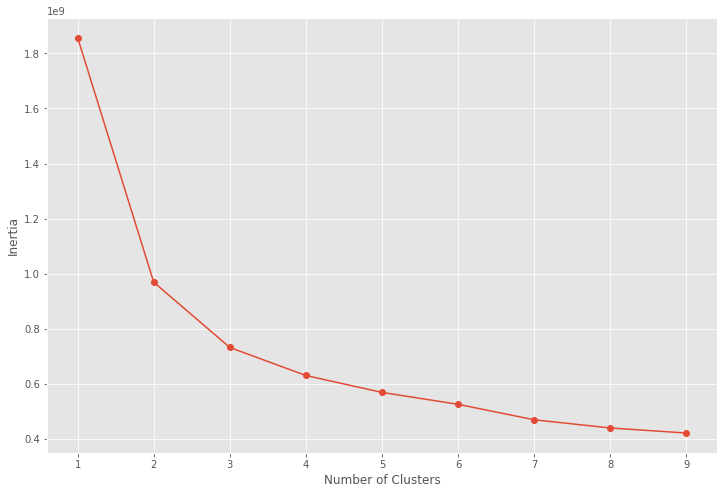

Finished in 3.0 seconds


In [9]:
# Import image
RAW = cv.imread('CTSCAN01.png')
IMAGE = cv.cvtColor(RAW, cv.COLOR_BGR2GRAY)

start_time = time()

# Compute inertia for each number of clusters
SSE = []
for i in range(1,10):
    K_MEANS = KMeans(n_clusters = i, init = 'random')
    K_MEANS.fit(IMAGE)
    SSE.append(K_MEANS.inertia_)
    print(f'Number of Clusters: {i} | SSE: {int(SSE[i-1])}')

# Plot Elbow Method
plt.figure(figsize=(12,8))
plt.plot(range(1,10), SSE, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

print(f'Finished in {(time() - start_time):.1f} seconds')

## **3. Compute K-Means Clustering**

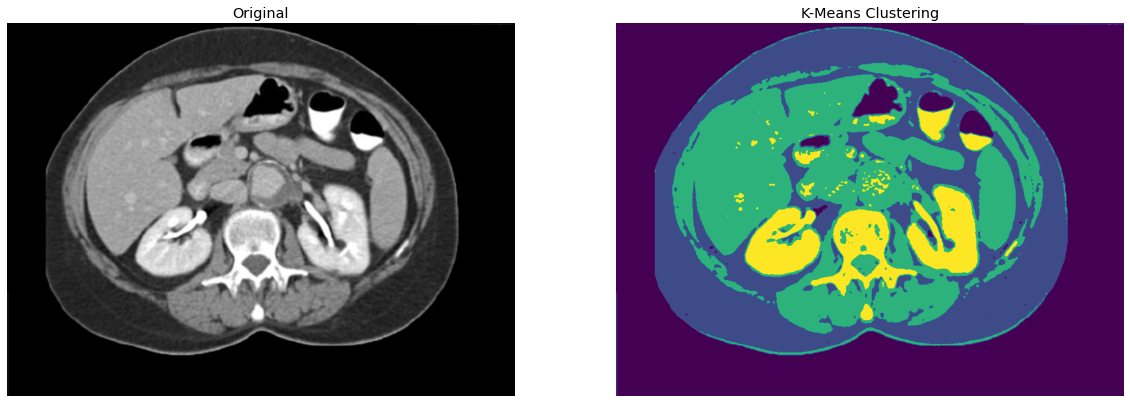

Finished in 3.1 seconds


In [10]:
# Import image
IMG = cv.imread('CTSCAN01.png')
GRAY = cv.cvtColor(IMG, cv.COLOR_BGR2GRAY)
(HEIGHT, WIDTH) = GRAY.shape

# Prepare image for the algorithm
FLAT = GRAY.flatten()
IMAGE = FLAT.reshape(-1,1)

start_time = time()

# Compute K-Means
K_MEANS = KMeans(n_clusters=4, init='k-means++')
labels = K_MEANS.fit_predict(IMAGE)
quant = K_MEANS.cluster_centers_[labels]

# Reshape images
ORIGINAL = IMAGE.reshape(HEIGHT, WIDTH)
CLUSTER = quant.reshape(HEIGHT, WIDTH)

# Plot images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].imshow(ORIGINAL, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(CLUSTER)
ax[1].set_title('K-Means Clustering')
ax[1].axis('off')

plt.show()

print(f'Finished in {(time() - start_time):.1f} seconds')